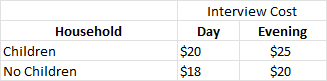

MSI is a market survey company. His client has given  the following requirement

1. Responses to be obtained from households with children and without children
2. Responses to be obtanied both morning and evening
3. Interview at leaset 400 households with children
4. Interview at least 400 households without children
5. The total numbr of households interviewed during the evening must be at least as great as the number of households interviewed during the day
6. At least 40 percent of the interviews for households with children must be conducted during the evening
7. At least 60 percent of the interviews for households without children must be conducted during the evening
8. Interview cost is given in the table

What is the household,time of day interview plan that will satisfy the contract requirements at a min total interviewing cost

In [2]:
import pulp

In [3]:
# Create a problem variable
prob = pulp.LpProblem('Media_Mix',pulp.LpMinimize)
#prob = pulp.LpProblem('Electronic_Communication',pulp.LpMaximize)

In [4]:
# Decision variables
# Let DC - Interviews ( Day with Children)
# Let EC - Interviews ( Evening with Children)
# Let DNC - Interviews ( Day without children)
# let ENC - Interviews ( Evening without children)

x = pulp.LpVariable("DC",lowBound=0,cat='Integer')
y = pulp.LpVariable('EC',lowBound=0,cat='Integer')
z = pulp.LpVariable('DNC',lowBound=0,cat='Integer')
v = pulp.LpVariable('ENC',lowBound=0,cat='Integer')

variables = []
# should assign different names
# Take care of the case of lowBound

In [5]:
# Objective function
prob += 20 * x + 25 * y+ 18*z + 20*v, "Total Quality Units"

In [7]:
# Constraints
prob += x+y >= 400
prob += z+v >= 400
prob += y+v-x-z >=0
prob += -0.4*x+0.6*y>=0  # EC>=0.4(DC+EC)
prob += -0.6*z+0.4*v >=0 # ENC >=0.6(DNC+ENC)
prob += x+y+z+v >=1000

In [8]:
# Solve the problem
prob.solve()

1

In [10]:
# Print the results
print("We need {} units of DC".format(x.varValue))
print("We Need {} units of EC".format(y.varValue))
print("We Need {} units of  DNC".format(z.varValue))
print("We Need {} units of  ENC".format(v.varValue))
print("Total Cost will be :{}".format(pulp.value(prob.objective)))

We need 240.0 units of DC
We Need 160.0 units of EC
We Need 240.0 units of  DNC
We Need 360.0 units of  ENC
Total Cost will be :20320.0
